In [1]:
# import geopandas with standard abbreviation gpd
import geopandas as gpd

# import matplotlib with standard abbreviation plt
import matplotlib.pyplot as plt

## Data

We will use simplified data about wild pig (*Sus scrofa*) sightings in CA.

USA from the Global Biodiversity Information Facility (GBIF).

We can read in a shapefile with `geopandas` by using the `gpd.read_file()` function.

In [3]:
# read in the data with geospacial components
pigs = gpd.read_file('data/gbif_sus_scroga_california/gbif_sus_scroga_california.shp')

pigs.head(2)

,gbifID,species,state,individual,day,month,year,inst,collection,catalogNum,identified,geometry
0,899953814,Sus scrofa,California,NaN,22.0,3.0,2014.0,iNaturalist,Observations,581956,edwardrooks,POINT (-121.53812 37.08846)
1,899951348,Sus scrofa,California,NaN,9.0,6.0,2007.0,iNaturalist,Observations,576047,Bruce Freeman,POINT (-120.54942 35.47354)


## `Geoseries` and `GeoDataFrame`

Core data strucutre of GeoPandas of it as a `pandas.DataFrame` with a dedicated geometry column.


The **geometry column** in a `gpd.GeoDataFrame` holds the geometry (point, polygon, etc) of each spatial feature. Columns in the `gpd.GeoDataFrame` with attributes about the features are pandas.Series like in a regular `pd.DataFrame`.


In [4]:
# type of pigs dataframe
print(type(pigs))

# type of the geomtry column
print(type(pigs.geometry))

# type of the gbifIG column
print(type(pigs.gbifID))

<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'geopandas.geoseries.GeoSeries'>
<class 'pandas.core.series.Series'>


The new data type of the geometry column is also reflected when we look at the data types of the columns in the data frame:

In [5]:
# check the data type of the columns
pigs.dtypes

gbifID           int64
species         object
state           object
individual     float64
day            float64
month          float64
year           float64
inst            object
collection      object
catalogNum      object
identified      object
geometry      geometry
dtype: object

## Geometric information

Two other important attributes if a `gdp.GeoDataFrame` are uts coordinates reference system (CRS) and its extent.

This of the CRS as instructions to locate each feature on the surface of the Earth. We access the CRS of a `gpd.GeoDataFrame` using the crs attribute:

In [6]:
# access CRS
pigs.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

The **extent** of the geo-dataframe is the boudning box covering *all* the features in our geo-dataframe. 
This is formed by finding the points that are furthest west, east, south and north.

We access information to create the extent of the geo-frame using the `total_bounds` attribute.


In [7]:
pigs.total_bounds

array([-124.29448 ,   32.593433, -115.4356  ,   40.934296])

EX.
Output of `pigs.total_bounds`: array([-124.29448 ,   32.593433, -115.4356  ,   40.934296])

x min = -124.29448 
x max = -115.4356
y min = 32.593433
y max = 40.934296


## Data wrangling

Geopandas is built on top of `pandas`, so (almost) everything we have learnt about wrangling pandas still applies.

In [9]:
# what years do we have?
# year is the sort_index() in the dataframe
pigs.year.value_counts().sort_index()

1818.0     31
1910.0      1
1925.0      1
1927.0      4
1929.0      3
         ... 
2019.0    101
2020.0    159
2021.0    164
2022.0    185
2023.0     98
Name: year, Length: 61, dtype: int64

We can use our usual data selection

In [10]:
# select data from 2020 onwards
pigs_recent = pigs[pigs.year >=2020]

print(len(pigs))
print(len(pigs_recent))

pigs_recent.head

1046
606


<bound method NDFrame.head of          gbifID     species       state  individual   day  month    year  \
61   4424675671  Sus scrofa  California         NaN  23.0    9.0  2023.0   
62   4424357894  Sus scrofa  California         NaN   6.0   10.0  2023.0   
63   4424357588  Sus scrofa  California         NaN   5.0   10.0  2023.0   
64   4424288359  Sus scrofa  California         NaN   7.0   10.0  2023.0   
65   4424285723  Sus scrofa  California         NaN   5.0   10.0  2023.0   
..          ...         ...         ...         ...   ...    ...     ...   
727  2563540650  Sus scrofa  California         NaN  20.0    1.0  2020.0   
728  2563520717  Sus scrofa  California         NaN  17.0    1.0  2020.0   
729  2563516057  Sus scrofa  California         NaN  18.0    1.0  2020.0   
730  2563508248  Sus scrofa  California         NaN  18.0    1.0  2020.0   
733  2557763832  Sus scrofa  California         NaN  11.0    1.0  2020.0   

            inst    collection catalogNum      identified

## Plotting

### `plot()`

`gdp.GeoDataFrame` has a `plot()` method that we can call directly ti create a quick view if the data.

The geospatial information of the `gpd.GeoDataFrame` will be used to create the axes of the plot.

Example

This is a quick look at our recent pigs data:

<AxesSubplot:>

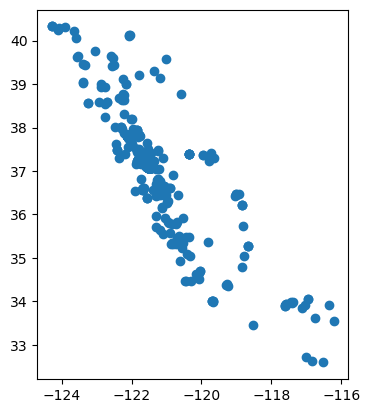

In [12]:
pigs_recent.plot()

### `matplotlib`'s' `fig` and `ax`

We use `matplotlib` to create more complex, customized graphs. In particular, maps.

We can interact with `matplotlib` via uts `pyplot` interface, which we imported as 

```python
import matplotlib as plt
```

`matplotlib` graphs the data in a **figure** which can have one or more **axes**.

The axis is *only* the area specified by the x-y axis and what is plotted in it.

1. Initialize a blank figure and axes by calling `pyplot`'s `subplots()` function, and
2. show the graph using `plt.show()`

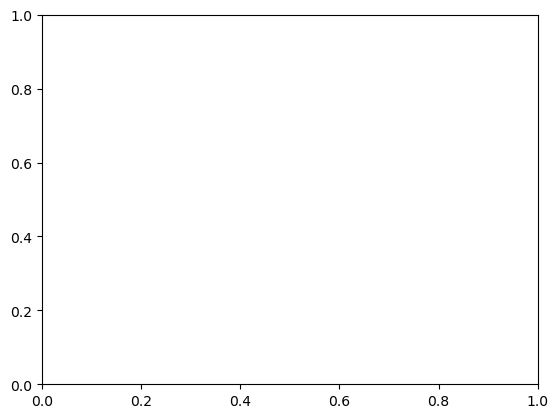

In [13]:
# create a blank figure (fig) and an empty axis (ax)
fig, ax = plt.subplots()

# display figure
plt.show()

## Adding a layer

When using `matplotlib` it can be useful to think of creating a plot, as adding layers to an axis

The general syntax to plot a dataframe df onto an axis is:

```python
# create a new figure
# we assing plt.subplots() to two separate variables fig and ax
fig, ax = plt.subplots()

# plot df on the ax axis
df.plot(ax = ax,
       ...) # other arguments for plot function

# display figure
plt.show()
```
Example

The first layer we want to add to our axis is the `pigs_recent` point data. We can plot our data using `matplotlib` like this:

<function matplotlib.pyplot.show(close=None, block=None)>

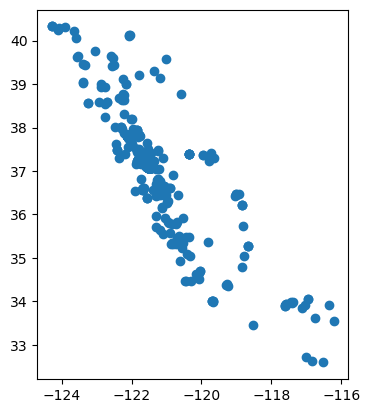

In [14]:
# create a new figure and axis
fig, ax = plt.subplots()

# add pigs point plot to our figure's axis
pigs_recent.plot(ax=ax)

# display figure
plt.show

### Customization

`Matplotlib` allows for a lot of customization. Some of it can be done directly in the `plot()` method for the `dataframe` (like we’ve done when ploting data using pandas), while other is done by updating attributes of the axis ax. 
The following image shows some examples of elements in the axis that can be updated.

Some basic customization of pigs data:

Text(139.46352036527887, 0.5, 'Latitude')

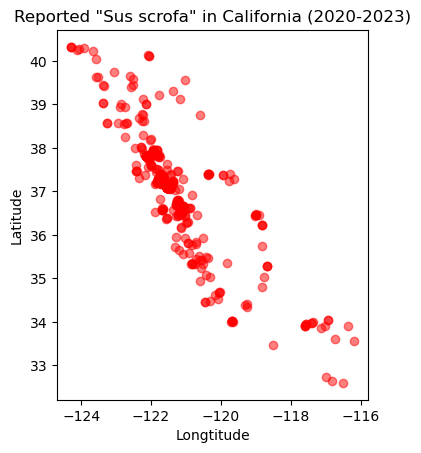

In [16]:
# initialize an empty figure
fig, ax = plt.subplots()

# add data to axis
# notice customization happens as arguments in plot()
pigs_recent.plot(ax=ax, 
                alpha=0.5,
                color='red')

# update axis
# customization separate from the data plotting

ax.set_title('Reported "Sus scrofa" in California (2020-2023)')
ax.set_xlabel('Longtitude')
ax.set_ylabel('Latitude')

## Exercise

1. Open CA boundary shapefile and store as ca_boundary. How many features does it have?
2. Add it to the pig signtings graph so that the CA boundary appears behind the points

In [19]:
# read CA boundary shapefile and store as ca_boundary
ca_boundary = gpd.read_file('data/ca-boundary/ca-boundary.shp')

ca_boundary.head(2)


,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,4,9,06,01779778,06,CA,California,00,G4000,A,403501101370,20466718403,+37.1551773,-119.5434183,"MULTIPOLYGON (((-119.63473 33.26545, -119.6363..."


In [25]:
# type of pigs dataframe
print(type(ca_boundary))

# type of the geomtry column
print(type(ca_boundary.geometry))


<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'geopandas.geoseries.GeoSeries'>


<bound method DataFrame.info of   REGION DIVISION STATEFP   STATENS GEOID STUSPS        NAME LSAD  MTFCC  \
0      4        9      06  01779778    06     CA  California   00  G4000   

  FUNCSTAT         ALAND       AWATER     INTPTLAT      INTPTLON  \
0        A  403501101370  20466718403  +37.1551773  -119.5434183   

                                            geometry  
0  MULTIPOLYGON (((-119.63473 33.26545, -119.6363...  >

In [30]:
# check the data type of the columns
# ca_boundary.dtypes

ca_boundary.geom_type

0    MultiPolygon
dtype: object

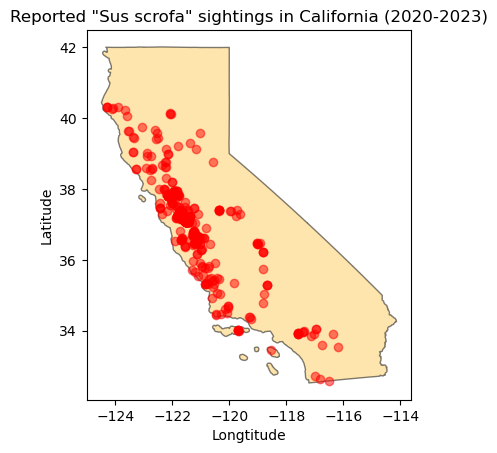

In [45]:
# initialize an empty figure
fig, ax = plt.subplots()

# add data to axis
# notice customization happens as arguments in plot()
ca_boundary.plot(ax=ax,
                color = '#fecc5c',
                alpha = 0.5,
                edgecolor = 'black')
pigs_recent.plot(ax=ax, 
                alpha=0.5,
                color='red')

# update axis
# customization separate from the data plotting

ax.set_title('Reported "Sus scrofa" sightings in California (2020-2023)')
ax.set_xlabel('Longtitude')
ax.set_ylabel('Latitude')

plt.show()